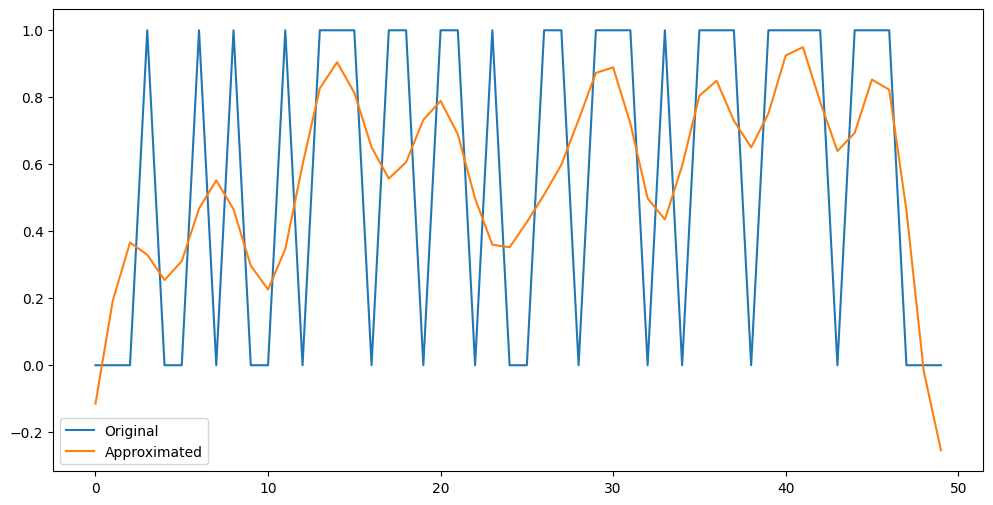

Bandwidth: (32.48524072461399+2.204706466072291j)


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate DFT
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

# Function to calculate Inverse DFT
def idft(X):
    N = len(X)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    return np.dot(e, X) / N

# Binary signal generation
N = 50

x = np.random.randint(0, 2, N)

# Calculate DFT
X = dft(x)

# Keep only the first n coefficients
n = 10
X[n:-n] = 0

# Calculate Inverse DFT
x_approx = idft(X)

plt.figure(figsize=(12, 6))
plt.plot(x, label='Original')
plt.plot(x_approx.real, label='Approximated')
plt.legend()
plt.show()

bandwidth = np.max(X) - np.min(X)

print(f'Bandwidth: {bandwidth}')


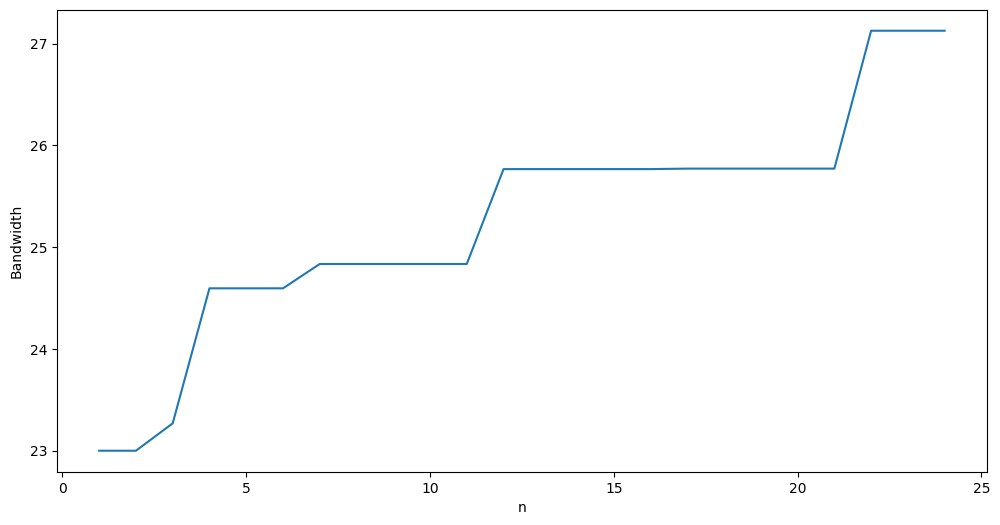

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate DFT
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

# Binary signal generation
N = 50

x = np.random.randint(0, 2, N)

# Calculate DFT
X = dft(x)

bandwidths = []
# Loop over values of n from 1 to min(1000, len(X)//2)
for n in range(1, min(1000, len(X)//2)):
    # Copy the Fourier coefficients
    X_copy = X.copy()
    # Keep only the first n coefficients
    X_copy[n:-n] = 0
    # Calculate bandwidth as the difference between the highest and lowest frequencies
    bandwidth = np.max(X_copy) - np.min(X_copy)
    # Append bandwidth to list
    bandwidths.append(bandwidth)

# Plot bandwidth vs. n
plt.figure(figsize=(12, 6))
plt.plot(range(1, min(1000, len(X)//2)), bandwidths)
plt.xlabel('n')
plt.ylabel('Bandwidth')
plt.show()
